In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df = pd.read_csv('GFM_data.csv', sep = '\t')

### Clean dataframe and standardize numerical data

In [7]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)

In [8]:
df['Amount_Raised'] = pd.Series(preprocessing.scale(df['Amount_Raised'].values))
df['Goal'] = pd.Series(preprocessing.scale(df['Goal'].values))
df['Number_of_Donations'] = pd.Series(preprocessing.scale(df['Number_of_Donations'].values))
df['FB_Shares'] = pd.Series(preprocessing.scale(df['FB_Shares'].values))
df['Number_of_Donors'] = pd.Series(preprocessing.scale(df['Number_of_Donors'].values))
df['Followers'] = pd.Series(preprocessing.scale(df['Followers'].values))

In [9]:
df = df.dropna()

In [10]:
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))
df['Length_of_Fundraising'] = pd.Series(preprocessing.scale(df['Length_of_Fundraising'].values))

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [11]:
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",6.787767,9.412042,7.487609,-0.842096,10.818038,7.557339,7.755310,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",5.431987,2.797580,2.165875,1.417135,6.408449,2.140900,2.181245,\r\nThe Navajo Nation COVID-19 Fund has been e...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",2.610111,3.459026,1.797042,1.618852,1.141705,1.755540,1.736621,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",1.734186,2.797580,0.985609,-0.075572,1.608379,0.899186,0.923285,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",1.414907,1.970772,2.397713,0.811984,0.103595,2.397806,2.452357,My name is Melissa Green and I am the mother o...


In [12]:
count = 0
for x in df['Location']:
    if x.find('$') != -1:
        count += 1
count

0

## Quantitative Predictors

### The relationship between Amount_Raised and Number_of_Donations appears linear

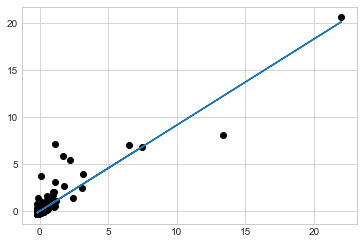

In [13]:
x = df['Number_of_Donations']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so number of donations is a strong predictor of amount raised

In [14]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4215.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:48:06   Log-Likelihood:                -434.48
No. Observations:                 836   AIC:                             873.0
Df Residuals:                     834   BIC:                             882.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.014      0.009      0.9

In [15]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [16]:
p_values

Number_of_Donations    0.0
Name: P>|t|, dtype: float64

### The relationship between Amount_Raised and Goal appears linear

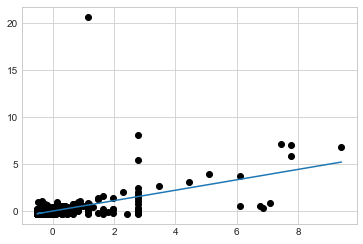

In [17]:
x = df['Goal']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so Goal is a strong predictor of Amount_Raised

In [18]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     367.3
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.07e-68
Time:                        16:48:12   Log-Likelihood:                -1034.6
No. Observations:                 836   AIC:                             2073.
Df Residuals:                     834   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.029      0.006      0.9

In [19]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [20]:
p_values

Goal    3.390507e-68
Name: P>|t|, dtype: float64

### The relationship between Amount_Raised and Followers appears linear

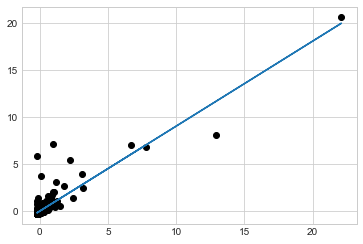

In [21]:
x = df['Followers']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so Goal is a strong predictor of Amount_Raised

In [22]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     3665.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          1.77e-307
Time:                        16:48:18   Log-Likelihood:                -482.65
No. Observations:                 836   AIC:                             969.3
Df Residuals:                     834   BIC:                             978.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.015      0.009      0.9

In [23]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [24]:
p_values

Followers    7.606328e-308
Name: P>|t|, dtype: float64

## Categorical Predictors

In [25]:
def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    df2[meds.index].boxplot(fontsize=14)

Text(0.5, 0.98, '')

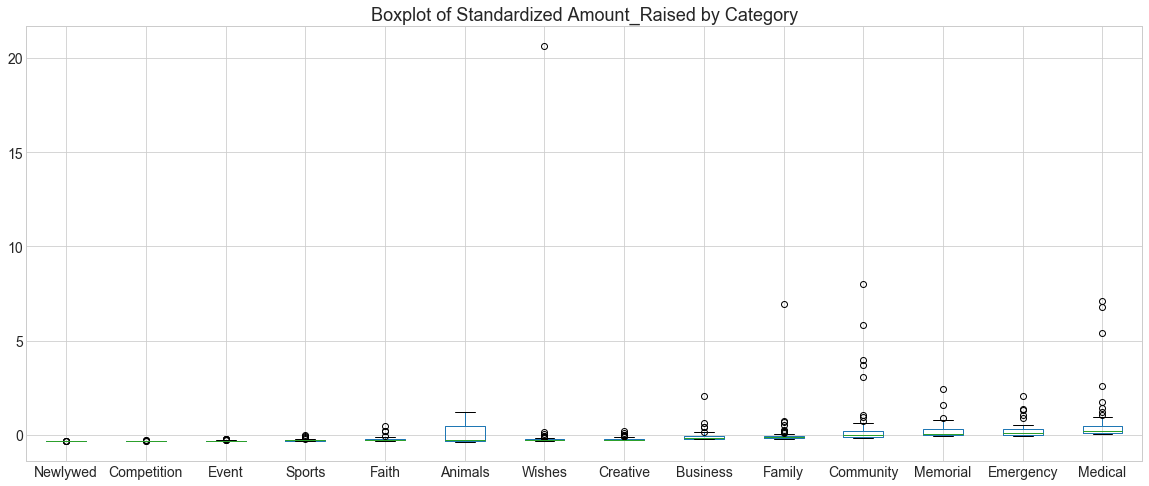

In [26]:
plt.figure(figsize=(20,8))
boxplot_sorted(df, by=["Category"], column="Amount_Raised")
plt.title("Boxplot of Standardized Amount_Raised by Category", fontsize=18)
plt.suptitle("")

Text(0.5, 0.98, '')

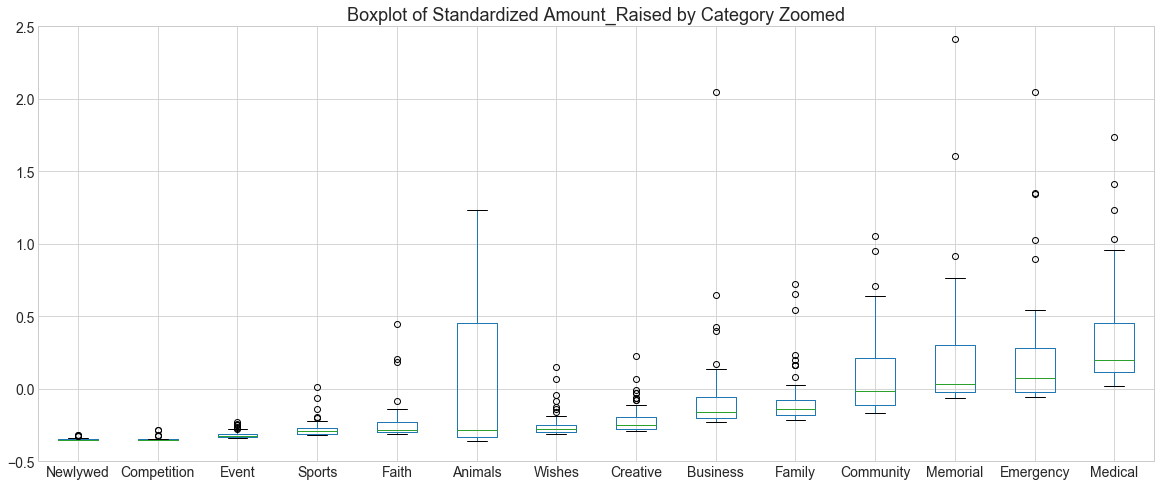

In [27]:
plt.figure(figsize=(20,8))
boxplot_sorted(df, by=["Category"], column="Amount_Raised")
plt.ylim(-0.5, 2.5)
plt.title("Boxplot of Standardized Amount_Raised by Category Zoomed", fontsize=18)
plt.suptitle("")

In [28]:
cat_subset = df[['Category', 'Amount_Raised']]
grps = pd.unique(cat_subset['Category'])
l_data = [cat_subset['Amount_Raised'][cat_subset['Category'] == grp] for grp in grps]
f, p = stats.f_oneway(*l_data)

In [25]:
f, p

(6.128265450927433, 4.9057089530166766e-11)

## Ridge Regression

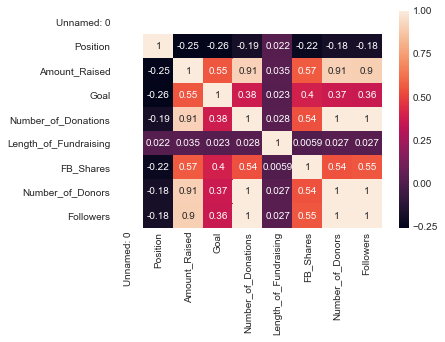

In [29]:
sn.heatmap(df.corr(), annot = True)
plt.show()

In [30]:
def to_integer(x):
    d = {'Business': 1, 'Community': 2, 'Competition': 3, 'Creative': 4, 'Education': 5, 'Emergency': 6, 'Event': 7, 'Faith': 8, 'Family':9, 'Medical': 10, 'Newlywed':11, 'Sports':12, 'Travel':13, 'Wishes': 14,'Memorial':15,'Animals':16}
    return d[x]

In [31]:
new_column = df.get('Category').apply(to_integer)
df = df.assign(Categorical_Assign = new_column)

In [32]:
reg_df = df[['Amount_Raised', 'Categorical_Assign', 'Goal', 'Number_of_Donations', 'FB_Shares', 'Number_of_Donors', 'Followers']].copy()

In [33]:
target_column = ['Amount_Raised']
predictors = list(set(list(reg_df.columns))-set(target_column))
reg_df[predictors] = reg_df[predictors]/reg_df[predictors].max()
reg_df['Category'] = df['Category']
reg_df = reg_df.dropna()
reg_df

,Amount_Raised,Categorical_Assign,Goal,Number_of_Donations,FB_Shares,Number_of_Donors,Followers,Category
0,6.787767,0.625,1.000000,0.340368,1.000000,3.440550e-01,0.350878,Medical
1,5.431987,0.625,0.297234,0.098455,0.592386,9.746647e-02,0.098687,Medical
2,2.610111,0.625,0.367511,0.081689,0.105537,7.992263e-02,0.078571,Medical
3,1.734186,0.625,0.297234,0.044803,0.148676,4.093630e-02,0.041773,Medical
4,1.414907,0.625,0.209388,0.108994,0.009576,1.091624e-01,0.110954,Medical
5,0.956077,0.625,0.016128,0.037139,-0.025639,3.801232e-02,0.038829,Medical
6,1.033765,0.625,0.297234,-0.000705,-0.038105,-8.342423e-03,-0.008400,Medical
7,0.872585,0.625,0.121543,0.006001,-0.018596,5.848601e-03,0.006446,Medical
8,0.791187,0.625,0.086404,0.027558,0.019260,2.729108e-02,0.028035,Medical
10,0.776198,0.625,0.121543,0.017498,0.381095,1.754450e-02,0.018713,Medical


In [34]:
X = df[predictors]#.values
y = df[target_column]#.values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, shuffle=True)
print(X_train.shape); print(X_test.shape)

(585, 6)
(251, 6)


In [36]:
rr = Ridge(alpha=0)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

0.26825206433853443
0.9373895139017747


In [37]:
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.3983185399262269
0.7593562335962315


In [38]:
r2_train_scores = []
r2_test_scores = []
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i, shuffle=True)
    rr = Ridge(alpha=0)
    rr.fit(X_train, y_train) 
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r2_train_scores.append(r2_score(y_train, pred_train_rr))
    r2_test_scores.append(r2_score(y_test, pred_test_rr))

In [39]:
hbins = [x/100 for x in range(0, 100, 5)]

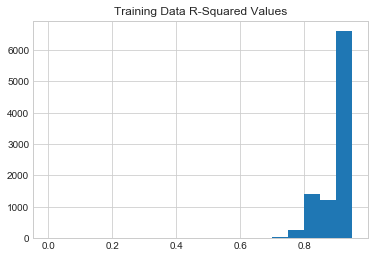

In [40]:
a = np.array(r2_train_scores) 
plt.hist(a, bins = hbins)
plt.title("Training Data R-Squared Values") 
plt.show()

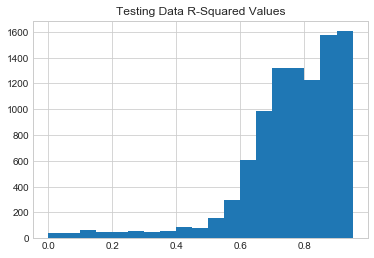

In [41]:
a = np.array(r2_test_scores) 
plt.hist(a, bins = hbins) 
plt.title("Testing Data R-Squared Values") 
plt.show()

In [42]:
np.mean(a)

0.7432438800086294

In [43]:

np.median(a)

0.7849145471019798

In [44]:
a = np.around(a, decimals = 3)
stats.mode(a, axis=None)

ModeResult(mode=array([0.921]), count=array([52]))

In [45]:
rr.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [46]:
X

,FB_Shares,Categorical_Assign,Number_of_Donors,Goal,Number_of_Donations,Followers
0,10.818038,10,7.557339,9.412042,7.487609,7.755310
1,6.408449,10,2.140900,2.797580,2.165875,2.181245
2,1.141705,10,1.755540,3.459026,1.797042,1.736621
3,1.608379,10,0.899186,2.797580,0.985609,0.923285
4,0.103595,10,2.397806,1.970772,2.397713,2.452357
5,-0.277363,10,0.834960,0.151795,0.817000,0.858218
6,-0.412222,10,-0.183245,2.797580,-0.015509,-0.185672
7,-0.201172,10,0.128467,1.143964,0.132024,0.142482
8,0.208358,10,0.599462,0.813241,0.606238,0.619639
10,4.122701,10,0.385374,1.143964,0.384938,0.413594


# Added NLTK 

In [47]:
reg_df = df[['Amount_Raised', 'Categorical_Assign', 'Goal', 'Number_of_Donations', 'FB_Shares', 'Number_of_Donors', 'Followers']].copy()

In [48]:
target_column = ['Amount_Raised']
predictors = list(set(list(reg_df.columns))-set(target_column))
reg_df[predictors] = reg_df[predictors]/reg_df[predictors].max()
reg_df['Category'] = df['Category']
reg_df = reg_df.dropna()
reg_df

,Amount_Raised,Categorical_Assign,Goal,Number_of_Donations,FB_Shares,Number_of_Donors,Followers,Category
0,6.787767,0.625,1.000000,0.340368,1.000000,3.440550e-01,0.350878,Medical
1,5.431987,0.625,0.297234,0.098455,0.592386,9.746647e-02,0.098687,Medical
2,2.610111,0.625,0.367511,0.081689,0.105537,7.992263e-02,0.078571,Medical
3,1.734186,0.625,0.297234,0.044803,0.148676,4.093630e-02,0.041773,Medical
4,1.414907,0.625,0.209388,0.108994,0.009576,1.091624e-01,0.110954,Medical
5,0.956077,0.625,0.016128,0.037139,-0.025639,3.801232e-02,0.038829,Medical
6,1.033765,0.625,0.297234,-0.000705,-0.038105,-8.342423e-03,-0.008400,Medical
7,0.872585,0.625,0.121543,0.006001,-0.018596,5.848601e-03,0.006446,Medical
8,0.791187,0.625,0.086404,0.027558,0.019260,2.729108e-02,0.028035,Medical
10,0.776198,0.625,0.121543,0.017498,0.381095,1.754450e-02,0.018713,Medical


In [49]:
predictors.append('Text')
X = df[predictors]#.values
y = df[target_column]#.values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, shuffle=True)
print(X_train.shape); print(X_test.shape)

(585, 7)
(251, 7)


In [51]:
def extract_entities(text):
    names = []
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                names.append(' '.join(c[0] for c in chunk.leaves()))
    new_text = text
    for name in names:
        if name in text:
            new_text = new_text.replace(name, 'NLP')
    return new_text

In [52]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
REPLACE_IP_ADDRESS = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')

def clean_text(x):
    ## removing names
    x = extract_entities(x)
    ## normalizing text by stripping white space and lower casing
    x =  x.lower().strip()
    ## removing urls
    x = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', x)
    ## removing phone numbers
    x = re.sub('\([0-9]{3}\)\s*[0-9]{3}-[0-9]{4}','',x)
    ## strip all non alphanumeric things
    x = re.sub('\n',' ',x)
    x = re.sub("[^a-zA-Z0-9 #]",'',x)
    x = re.sub("\s+",' ',x)
    text = x.replace('\n', ' ').lower()# lowercase text
    text = REPLACE_IP_ADDRESS.sub('', text) # remove ip address
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([w for w in text.split() if not w in STOPWORDS])# delete stopwords from text
    
    return text

In [53]:
p1 = Pipeline([('clean',FunctionTransformer(lambda x: x['Text'].apply(clean_text))),('tfidf', TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5))])

p2 = Pipeline([('identity', FunctionTransformer(lambda x: x))])

ctrans = ColumnTransformer(transformers=[('log', p1, ['Text']), ('identity',p2,predictors[:-1])])

p3 = Pipeline(steps=[('preprocessor', ctrans), ('regressor', Ridge(alpha=0))])


In [54]:
p3.fit(X_train,y_train)
pred_train_p3= p3.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_p3)))
print(r2_score(y_train, pred_train_p3))

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


ValueError: could not convert string to float: "At just 21 years old, Katey Malin has been bravely fighting ependymoma brain cancer since 2015. She has spent time at St.Judes Children's Hospital and here in Austin at Dell Children's Hospital undergoing extensive surgeries and treatments. Katey is a graduate of Leander High School where she was a proud Blue Belle and even through all of her hospital stays has still kept up and succeeded with her classes at Texas State University. Everyone who knows Katey, knows what a special young lady she is.\xa0 Katey met Austin in middle school and after her first surgery, they reconnected on Facebook. They went on their first date the following January on Katey's birthday and they they have been together ever since. He has been right be her side through all of this and they are truly a picture of what unconditional love is. On April 23, 2020, Katey went in for a routine scan and port surgery, and the doctors found 3 new spots on her brain. The doctors told Katey's family, her precious parents Ken and Belinda Malin, that\xa0 it won't be years but months that sweet Katey has left.\xa0 Austin, Katey's boyfriend made the decision to propose and Katey SAID YES! We are all so happy for Austin and Katey, that even in the midst of all of this, LOVE WINS. Austin and Katey will be married in Burnet, TX on July 18, 2020. As you can imagine, with medical bills, planning a wedding could be stressful and we want to not only take that stress away, but we want to make it THE DREAM WEDDING for Katey and Austin. We also want this money to be used for Austin and Katey to experience as much as they can and make as many memories together as possible. Let's join together, family and friends of the Malin's and Austin and help make this dream come true for a very special young lady and a beautiful couple that deserves the world."

In [ ]:
pred_test_p3= p3.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_p3))) 
print(r2_score(y_test, pred_test_p3))

In [ ]:
r2_train_scores = []
r2_test_scores = []
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i, shuffle=True)
    p3 = Pipeline(steps=[('preprocessor', ctrans), ('regressor', Ridge(alpha=0))])
    p3.fit(X_train,y_train)
    pred_train_p3= p3.predict(X_train)
    pred_test_p3= p3.predict(X_test)
    r2_train_scores.append(r2_score(y_train, pred_train_p3))
    r2_test_scores.append(r2_score(y_test, pred_test_p3))

In [ ]:
hbins = [x/100 for x in range(0, 100, 5)]

In [ ]:
a = np.array(r2_train_scores) 
plt.hist(a, bins = hbins)
plt.title("Training Data R-Squared Values") 
plt.show()

In [ ]:
a = np.array(r2_test_scores) 
plt.hist(a, bins = hbins) 
plt.title("Testing Data R-Squared Values") 
plt.show()

In [ ]:
np.mean(a), np.median(a)